# Data Exploration 1 Assignment
    1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
    2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
    3. In your chosen state, which of the lessons are the students more successful, math or reading?
    4. What are the distributions of the math and reading scores in the sample?
    5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

## Data Import and Cleaning
See 17.3 assignment for cleaning

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
                    postgres_user, postgres_pw, postgres_host, 
                    postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
# filll data initially by year groupby then by interpolate
df = df.groupby('YEAR', as_index=False).apply(
                lambda x: x.fillna(x.mean())).reset_index()

df = df.apply(lambda x: x.interpolate(
                method='linear', limit_direction='forward'))
df = df.apply(lambda x: x.interpolate(
                method='linear', limit_direction='backward'))
df = df.apply(lambda x: x.interpolate(
                method='nearest'))


df.head()

,level_0,level_1,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,0,0,1992_ALABAMA,ALABAMA,1992,727716.0,2678885.0,304177.0,1659028.0,715680.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,263.307067
1,0,1,1992_ALASKA,ALASKA,1992,727716.0,1049591.0,106780.0,720711.0,222100.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,218.410116,266.360319,212.712256,258.859712
2,0,2,1992_ARIZONA,ARIZONA,1992,727716.0,3258079.0,297888.0,1369815.0,1590376.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,0,3,1992_ARKANSAS,ARKANSAS,1992,727716.0,1711959.0,178571.0,958785.0,574603.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,0,4,1992_CALIFORNIA,CALIFORNIA,1992,727716.0,26260025.0,2072470.0,16546514.0,7641041.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,263.307067


## 1. Derive the desctiptive statistics of the data
Looking at the data below the average total revenue minus total expenditure is negative meaning that most states on average are running on a defecit. Also lookking at the Grades 4 through Grades 12 there is a large drop in students the higher the education level. 

In [4]:
round(df.describe(), 2)

,level_0,level_1,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,...,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00,1492.00
mean,12.43,745.50,2004.43,932297.21,9585986.88,797541.69,4386703.48,4401741.71,9674645.69,5014243.02,...,60249.67,60004.49,50760.29,484680.25,230867.57,801526.24,229.65,272.98,216.38,263.37
std,7.39,430.85,7.39,975521.36,11232144.40,1079221.36,5228505.69,5332153.63,11419426.39,6000877.17,...,78343.30,77041.21,66240.27,628116.91,300238.76,912712.74,10.05,9.04,6.06,4.60
min,0.00,0.00,1992.00,43866.00,465650.00,31020.00,0.00,22093.00,481665.00,265549.00,...,633.00,437.00,311.00,4878.00,1808.00,7254.00,187.13,232.83,178.56,236.38
25%,6.00,372.75,1998.00,315094.00,2546260.75,217020.00,1356434.00,944796.25,2523968.50,1343611.25,...,10372.75,10555.75,9342.00,83507.25,40568.25,229357.75,220.63,266.12,211.89,260.97
50%,12.00,745.50,2004.00,736567.50,6077218.50,470828.00,2946394.50,2565185.79,6179938.00,3168123.00,...,40164.00,39709.50,34622.00,321790.00,154003.00,647326.00,231.26,272.31,216.89,262.69
75%,19.00,1118.25,2011.00,994393.50,11700570.75,947644.50,5371554.47,5271841.41,11846719.58,6034133.00,...,71814.25,72131.00,64898.89,574911.75,282539.00,883005.40,238.01,279.87,220.21,266.68
max,25.00,1491.00,2017.00,6307022.00,89217262.00,9990221.00,50904567.00,36105265.00,85320133.00,43964520.00,...,493415.00,500143.00,498403.00,3929869.00,2013687.00,5944746.00,253.42,300.57,236.77,280.50


## 2. Graph a state's revenue and expenses

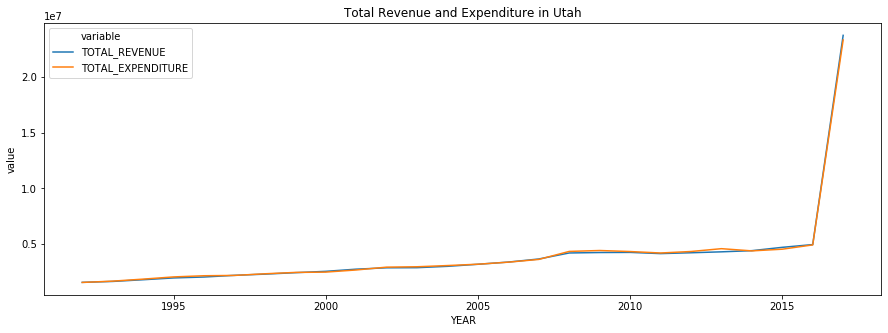

In [5]:
plt.figure(figsize=(15, 5))

# group by year and state and create new dataframe with only utah data
utah_df = df.groupby(['YEAR', 'STATE'], as_index=False).mean()
utah_df = utah_df.loc[utah_df['STATE']=='UTAH']

# plot the revenue and expenses by year
# combine the revenue and expenditure columns  together with melth function
sns.lineplot(x='YEAR', y='value', hue='variable', 
             data=pd.melt(utah_df, id_vars=['YEAR'], 
                          value_vars=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']))

plt.title('Total Revenue and Expenditure in Utah')
plt.show()

## 3. Students success math or reading

In [6]:
# create list of columns with test scores
scores = ['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 
          'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

# create dictionary for the scores
avg_score_list = {}

# populate the dictionaries with the mean of each category in Utah
for score in scores:
        avg_score_list.update({score:utah_df[score].mean()})

# return the best score and category in Utah
maximum = max(avg_score_list, key=avg_score_list.get)
print('The highest test scores in utah on average were in {} at {}'.format(
    maximum, avg_score_list[maximum]))

The highest test scores in utah on average were in AVG_MATH_8_SCORE at 273.2310071862464


## 4. Distributions of Math and Reading Scores
Looking at the distirbutions below one can see that the 4th grade math and reading scores are well below the 8th grade scores, which is expected due to younger age group. The 8th grade math score the higher grades as shown below. 

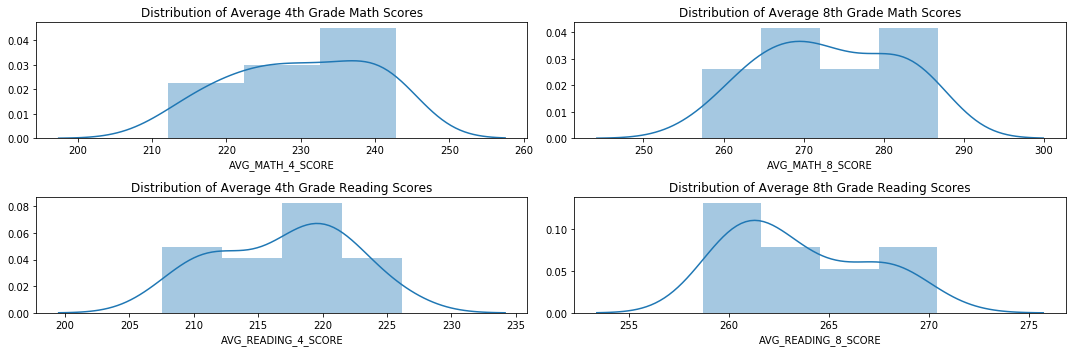

In [7]:
plt.figure(figsize=(15,5))

# create 4 distribution plots for each math and reading category
plt.subplot(2, 2, 1)
sns.distplot(utah_df['AVG_MATH_4_SCORE'])
plt.title('Distribution of Average 4th Grade Math Scores')

plt.subplot(2, 2, 2)
sns.distplot(utah_df['AVG_MATH_8_SCORE'])
plt.title('Distribution of Average 8th Grade Math Scores')

plt.subplot(2, 2, 3)
sns.distplot(utah_df['AVG_READING_4_SCORE'])
plt.title('Distribution of Average 4th Grade Reading Scores')

plt.subplot(2, 2, 4)
sns.distplot(utah_df['AVG_READING_8_SCORE'])
plt.title('Distribution of Average 8th Grade Reading Scores')

plt.tight_layout()
plt.show()

## 5. Fill missing values of math and reading scores
The math and reading scores were filled above during the data cleaning process. Below is a printout of the dataframe to verify that it has all been filled.

In [8]:
# print dataframe
df[scores]

,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,208.327876,252.187522,207.963517,263.307067
1,218.410116,266.360319,212.712256,258.859712
2,215.253932,265.366278,206.212716,262.169895
3,210.206028,256.312090,208.634458,264.619665
4,208.398961,260.892247,196.764414,263.307067
5,221.023429,272.398433,213.480890,266.419687
6,226.798480,273.739345,222.417599,264.713904
7,217.899972,262.868585,206.389052,261.577921
8,192.600553,234.924621,178.557612,265.976765
9,213.689751,259.908848,204.882606,262.118986
